In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
qml.drawer.use_style('sketch')

## Description

* Start with one wire (qumode) in the vacuum state

* Displace the qumode (Linearly shifts the state of the qumode in phase space)

* Rotate the qumode (Another linear transform in phase space)

* Measure the photon number

In [3]:
dev_gaussian = qml.device("default.gaussian", wires=1)

In [4]:
@qml.qnode(dev_gaussian)
def mean_photon_gaussian(mag_alpha, phase_alpha, phi):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    qml.Rotation(phi, wires=0)
    return qml.expval(qml.NumberOperator(0))

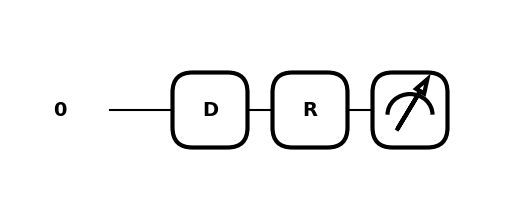

In [5]:
qml.draw_mpl(mean_photon_gaussian)(0, 0, 0)
plt.show()

In [6]:
mean_photon_gaussian(0,0,0)

array(0.)

## Optimization

In [7]:
def cost(params):
    return (mean_photon_gaussian(params[0], params[1], params[2]) - 1.0) ** 2

In [10]:
init_params = np.array([0.015, 0.02, 0.005], requires_grad=True)
print(cost(init_params))

0.9995500506249999


In [11]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

steps = 20
params = init_params

for i in range(steps):
    params = opt.step(cost, params)
    print(f"Cost after step {i+1:5d}: {cost(params):8f}")

print(f"Optimized mag_alpha:\t{params[0]:8f}")
print(f"Optimized phase_alpha:\t{params[1]:8f}")
print(f"Optimized phi:\t\t{params[2]:8f}")

Cost after step     1: 0.999118
Cost after step     2: 0.998273
Cost after step     3: 0.996618
Cost after step     4: 0.993382
Cost after step     5: 0.987074
Cost after step     6: 0.974837
Cost after step     7: 0.951332
Cost after step     8: 0.907043
Cost after step     9: 0.826649
Cost after step    10: 0.690812
Cost after step    11: 0.490303
Cost after step    12: 0.258845
Cost after step    13: 0.083224
Cost after step    14: 0.013179
Cost after step    15: 0.001001
Cost after step    16: 0.000049
Cost after step    17: 0.000002
Cost after step    18: 0.000000
Cost after step    19: 0.000000
Cost after step    20: 0.000000
Optimized mag_alpha:	0.999994
Optimized phase_alpha:	0.020000
Optimized phi:		0.005000
